In [39]:
import numpy as np
import ast
import requests

with open('hello.png', 'rb') as f:
    image = f.read()

response = requests.get(
    url='http://127.0.0.1:8001/api/annotate/points',
    params={
        'p': [ '500,300', '300,400', '100,100', '200,200' ]
    },
    data=image
)

dtype = response.headers['x-numpy-dtype']
shape = response.headers['x-numpy-shape']

results = np.frombuffer(response.content, dtype=np.dtype(dtype))
results = results.reshape(ast.literal_eval(shape))

print(results.shape)
print(np.unique(results))

(1, 476, 635)
[False]


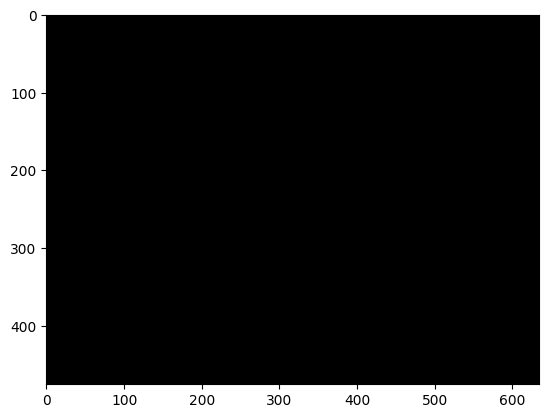

In [40]:
from matplotlib import pyplot as plt

for result in results:
    plt.imshow(result, cmap='gray')